In [1]:
import metnum
import pandas as pd 
import numpy as np
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/train.csv")


In [3]:

y = data["label"]
X = data[data.columns[1:]]

In [4]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

pca = metnum.PCA(19)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

model = metnum.KNNClassifier(3)

model.fit(X_train_PCA, y_train)

resultados = model.predict(X_test_PCA)

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from seaborn import heatmap
%matplotlib inline
cMatrix = confusion_matrix(y_test,resultados)

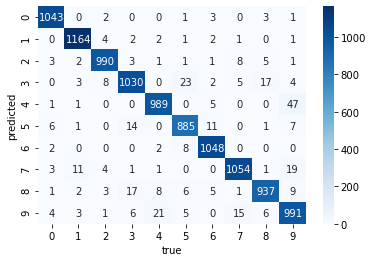

In [6]:
ax = plt.axes()
hm = heatmap(cMatrix, ax= ax, cmap="Blues", annot=True, fmt = "d")

ax.set_xlabel("true")

ax.set_ylabel("predicted")
plt.savefig("./graphics/confusion.jpg")

In [7]:
precisiones = []
recalls = []
for k in range(10):
    precisiones.append(cMatrix[k][k]/(cMatrix[k].sum()))
    recalls.append(cMatrix[k][k]/(cMatrix[:,k].sum()))

In [8]:
recalls = pd.Series(recalls)
precisiones = pd.Series(precisiones)
precision_promedio = precisiones.mean()
recall_promedio = recalls.mean()

In [9]:
result = pd.DataFrame([precisiones,recalls]).T
result.columns = ["precision", "recall"]
index = result.index
index.name = "clase"
index = [str(i) for i in range(10)]
index.append("promedio")
result

,precision,recall
clase,,
0,0.990503,0.981185
1,0.988955,0.980623
2,0.975369,0.978261
3,0.943223,0.959925
4,0.948226,0.965820
5,0.956757,0.951613
6,0.988679,0.973073
7,0.963437,0.972325
8,0.947422,0.965979


In [10]:
promedios = pd.Series([result["precision"].mean(),result["recall"].mean()])
promedios.index = ["precision","recall"]
promedios.name = "promedio"
result = result.append(promedios)

In [11]:
import dataframe_image as dfi

dfi.export(result, "./graphics/recalls-presiciones.jpg")

In [12]:
result

,precision,recall
clase,,
0,0.990503,0.981185
1,0.988955,0.980623
2,0.975369,0.978261
3,0.943223,0.959925
4,0.948226,0.965820
5,0.956757,0.951613
6,0.988679,0.973073
7,0.963437,0.972325
8,0.947422,0.965979


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
rfc_preds = model_rfc.predict(X_test)
print(accuracy_score(y_test, rfc_preds))

0.9613333333333334


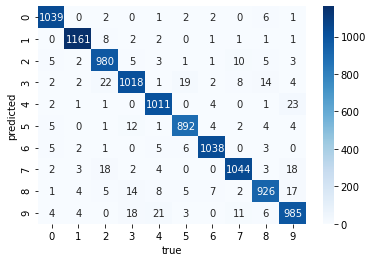

In [14]:
cMatrix_forest = confusion_matrix(y_test,rfc_preds)
heatmap(cMatrix_forest,ax= ax, cmap="Blues", annot=True, fmt = "d")
ax = plt.axes()
hm = heatmap(cMatrix_forest, ax= ax, cmap="Blues", annot=True, fmt = "d")

ax.set_xlabel("true")

ax.set_ylabel("predicted")
plt.savefig("./graphics/confusion_FOREST.jpg")

def func(x, pos):
    for k in range(15):
        return "{:.2f}".format(x).replace(str(k), "")

annotate_heatmap(hm, valfmt=matplotlib.ticker.FuncFormatter(func))


In [15]:
print(accuracy_score(y_test, resultados))
resultados

0.9648571428571429


array([6., 6., 4., ..., 4., 5., 9.])

In [16]:
print(accuracy_score(y_test, rfc_preds))

0.9613333333333334


In [17]:
from sklearn.metrics import cohen_kappa_score

In [18]:
cohen_kappa_score(rfc_preds,resultados)

0.95754854518698